In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plot
import process_edu as pe
import seaborn as sns
%matplotlib inline
sns.set(font='times new roman')
current_palette = sns.color_palette()
sns.set_palette([current_palette[2],current_palette[0], current_palette[1]])

In [2]:
def gen_frame():
    sheet_list= [0,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66]
    week_list=range(1,12)
    metro_names = ['US','San Francisco-Oakland-Berkeley, CA MSA','Washington-Arlington-Alexandria, DC-VA-MD-WV MSA', 'Atlanta-Sandy Springs-Alpharetta, GA MSA',
                   'Boston-Cambridge-Newton, MA-NH MSA','Detroit-Warren-Dearborn, MI MSA','Houston-The Woodlands-Sugar Land, TX MSA',
                   'Phoenix-Mesa-Chandler, AZ MSA','Miami-Fort Lauderdale-Pompano Beach, FL MSA','Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
                   'Riverside-San Bernadino-Ontario, CA MSA','Dallas-Fort Worth-Arlington, TX MSA','Chicago-Naperville-Elgin, IL-IN-WI MSA',
                   'New York-Newark-Jersey City, NY-NJ-PA','Seattle-Tacoma-Bellevue, WA MSA','Los Angeles-Long Beach-Anaheim, CA MSA']
    frame_list = []
    for sheets in sheet_list:
        frame_list.append(pe.process_edu(11,sheet_name=sheets))
        
    frame_dict = dict(zip(metro_names,frame_list))    
    return frame_dict

In [3]:
# we want to work with dataframes that have only the values that we are interested in
race_rows = ['Hispanic or Latino (may be of any race)','White alone, not Hispanic','Black alone, not Hispanic',
            'Asian alone, not Hispanic','Two or more races + Other races, not Hispanic']
income_rows = ['Less than \\$25,000', '\\$25,000 - \\$34,999',
               '\\$35,000 - \\$49,999', '\\$50,000 - \\$74,999', '\\$75,000 - \\$99,999',
               '\\$100,000 - \\$149,999', '\\$150,000 - \\$199,999', '\\$200,000 and above',]

income_dict = gen_frame()
race_dict = gen_frame()

for places in income_dict.keys():
    income_dict[places] = income_dict[places].loc[income_rows]
for places in race_dict.keys():
    race_dict[places] = race_dict[places].loc[race_rows]

In [4]:
#create frame where each row is total of that spatial scale
msa_dict = gen_frame()
for places in msa_dict.keys():
    msa_dict[places] = msa_dict[places].loc['Total']

msa_dframe = pd.DataFrame(msa_dict.values())
msa_dframe.index = ['US','San Francisco-Oakland-Berkeley, CA MSA','Washington-Arlington-Alexandria, DC-VA-MD-WV MSA', 'Atlanta-Sandy Springs-Alpharetta, GA MSA',
                   'Boston-Cambridge-Newton, MA-NH MSA','Detroit-Warren-Dearborn, MI MSA','Houston-The Woodlands-Sugar Land, TX MSA',
                   'Phoenix-Mesa-Chandler, AZ MSA','Miami-Fort Lauderdale-Pompano Beach, FL MSA','Philadelphia-Camden-Wilmington, PA,NJ-DE-MD MSA',
                   'Riverside-San Bernadino-Ontario, CA MSA','Dallas-Fort Worth-Arlington, TX MSA','Chicago-Naperville-Elgin, IL-IN-WI MSA',
                   'New York-Newark-Jersey City, NY-NJ-PA','Seattle-Tacoma-Bellevue, WA MSA','Los Angeles-Long Beach-Anaheim, CA MSA']
msa_dframe.drop(['Total'],axis=1)

,Provided by the children’s school or school district to use outside of school(device),"Provided by someone in the household or family, or it is the child’s(device)",Provided by another source(device),Did not report(device),Paid for by the children’s school or school district(internet),Paid for by someone in the household or family(internet),Paid for by another source(internet),Did not report(internet),Total device(not including DNR),Total internet(not including DNR),"% Provided by someone in the household or family, or it is the child’s(device)",% Provided by the children’s school or school district to use outside of school(device),% Provided by another source(device),% Paid for by someone in the household or family(internet),% Paid for by the children’s school or school district(internet),% Paid for by another source(internet)
US,23411291.0,45921832.0,1742691.0,3213552.0,1568002.0,59473144.0,1047396.0,3726926.0,61578246.0,61064872.0,0.745748,0.380188,0.028300,0.973934,0.025678,0.017152
"San Francisco-Oakland-Berkeley, CA MSA",253609.0,487873.0,6592.0,20042.0,4746.0,624431.0,21482.0,30901.0,654828.0,643969.0,0.745040,0.387291,0.010067,0.969660,0.007370,0.033359
"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",364254.0,897282.0,857.0,35638.0,4329.0,1061940.0,12957.0,44035.0,1086004.0,1077607.0,0.826223,0.335408,0.000789,0.985461,0.004017,0.012024
"Atlanta-Sandy Springs-Alpharetta, GA MSA",283583.0,963631.0,17775.0,52626.0,2615.0,1150223.0,21208.0,28881.0,1148173.0,1171918.0,0.839273,0.246986,0.015481,0.981488,0.002231,0.018097
"Boston-Cambridge-Newton, MA-NH MSA",338891.0,782033.0,4548.0,17321.0,2291.0,910194.0,2911.0,36139.0,932876.0,914058.0,0.838303,0.363276,0.004875,0.995773,0.002506,0.003185
"Detroit-Warren-Dearborn, MI MSA",350085.0,702472.0,20204.0,60797.0,16732.0,948547.0,20079.0,63451.0,976487.0,973833.0,0.719387,0.358515,0.020690,0.974035,0.017182,0.020619
"Houston-The Woodlands-Sugar Land, TX MSA",476692.0,1290668.0,18092.0,146026.0,56483.0,1665749.0,16067.0,93460.0,1659902.0,1712468.0,0.777557,0.287181,0.010899,0.972718,0.032983,0.009382
"Phoenix-Mesa-Chandler, AZ MSA",156310.0,819154.0,20784.0,43301.0,4665.0,934261.0,7277.0,38788.0,938856.0,943369.0,0.872502,0.166490,0.022138,0.990345,0.004945,0.007714
"Miami-Fort Lauderdale-Pompano Beach, FL MSA",396061.0,778130.0,21002.0,30190.0,3053.0,1046349.0,12049.0,43957.0,1067466.0,1053699.0,0.728951,0.371029,0.019675,0.993025,0.002897,0.011435
"Philadelphia-Camden-Wilmington, PA,NJ-DE-MD MSA",727328.0,916530.0,14733.0,22484.0,66100.0,1307513.0,19734.0,45730.0,1387169.0,1363923.0,0.660720,0.524325,0.010621,0.958641,0.048463,0.014469


In [5]:
msa_graph_list=['% Provided by someone in the household or family, or it is the child’s(device)',
               '% Provided by the children’s school or school district to use outside of school(device)',
               '% Provided by another source(device)',
               '% Paid for by someone in the household or family(internet)',
               '% Paid for by the children’s school or school district(internet)',
               '% Paid for by another source(internet)']

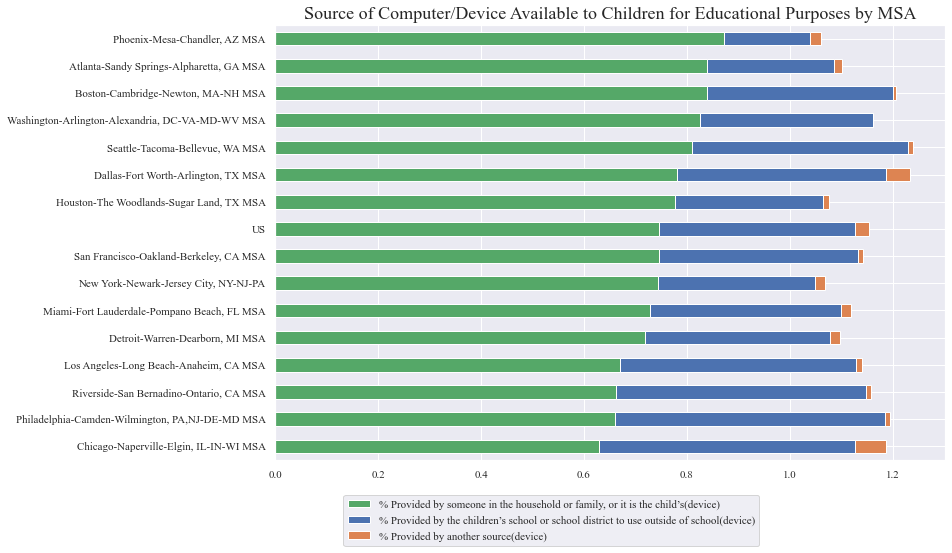

In [23]:
#adds to over 100%, allowed to select multiple categories
msa_dframe[msa_graph_list[:3]].sort_values(
    by=['% Provided by someone in the household or family, or it is the child’s(device)']).plot.barh(
    stacked=True,figsize=(12,8)
    )
plot.legend(bbox_to_anchor=(.1, -0.2), loc='lower left',
               ncol=1, borderaxespad=0.1)
plot.title('Source of Computer/Device Available to Children for Educational Purposes by MSA', fontsize=18)
plot.savefig(f'../figures/EDU/Source of ComputerDevice Available to Children for Educational Purposes by MSA.png',bbox_inches='tight')

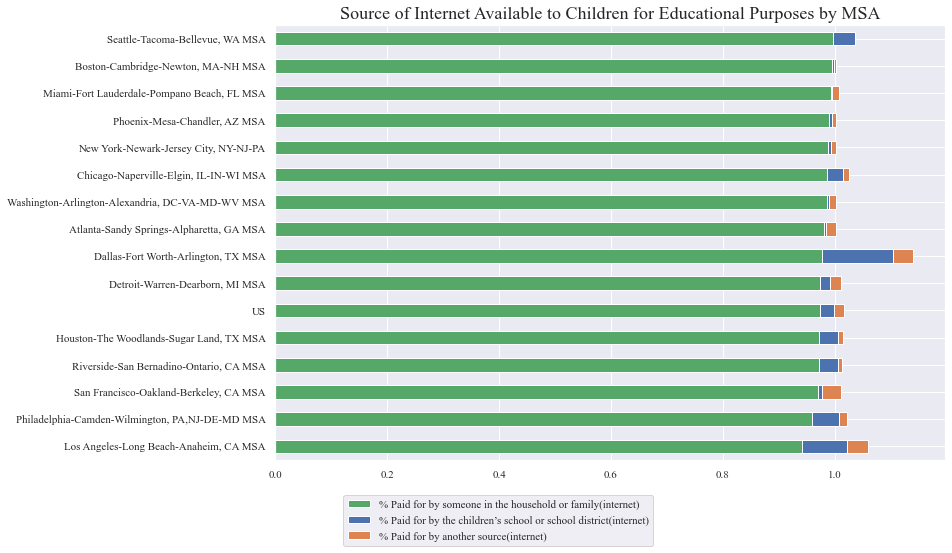

In [24]:
#adds to over 100%, allowed to select multiple categories
msa_dframe[msa_graph_list[3:]].sort_values(
    by=['% Paid for by someone in the household or family(internet)']).plot.barh(
    stacked=True,figsize=(12,8)
    )
plot.legend(bbox_to_anchor=(.1, -0.2), loc='lower left',
               ncol=1, borderaxespad=0.1)
plot.title('Source of Internet Available to Children for Educational Purposes by MSA', fontsize=18)
plot.savefig(f'../figures/EDU/Source of Internet Available to Children for Educational Purposes by MSA.png',bbox_inches='tight')

In [8]:
#easy way to pass what to plot
graph_list=['% Provided by someone in the household or family, or it is the child’s(device)',
            '% Provided by the children’s school or school district to use outside of school(device)',
            '% Provided by another source(device)',
            '% Paid for by someone in the household or family(internet)',
            '% Paid for by the children’s school or school district(internet)',
            '% Paid for by another source(internet)']

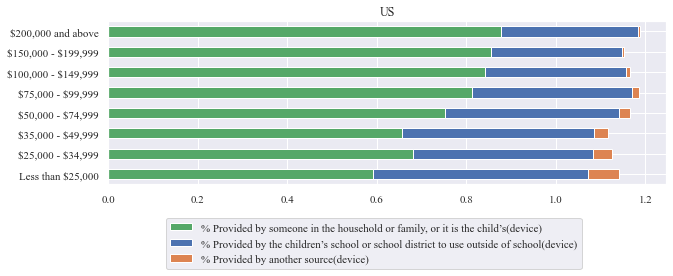

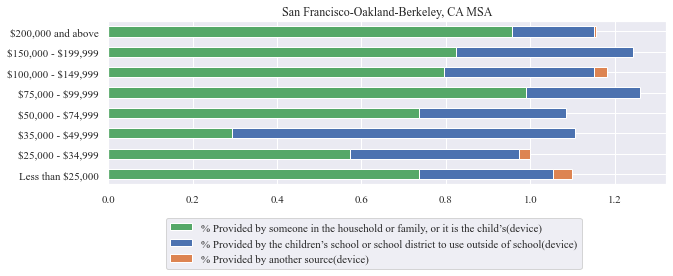

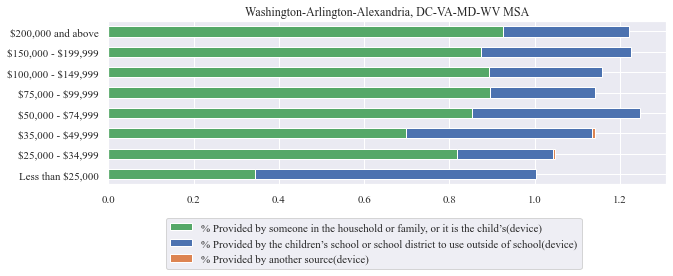

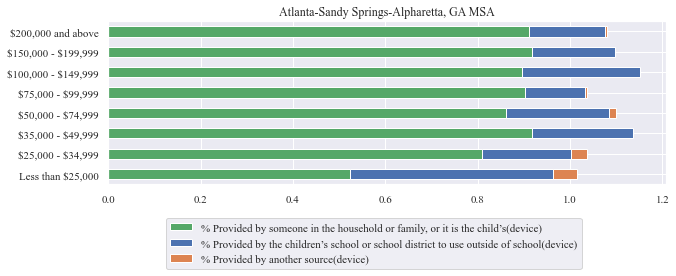

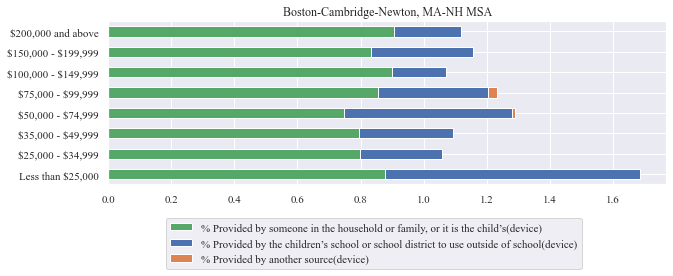

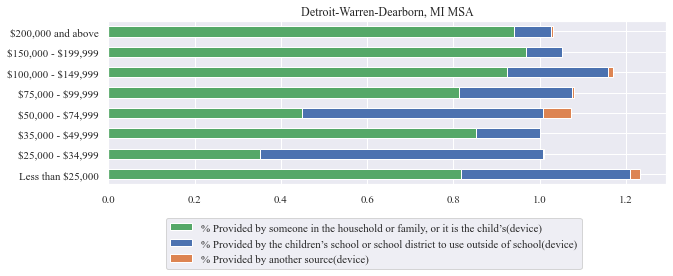

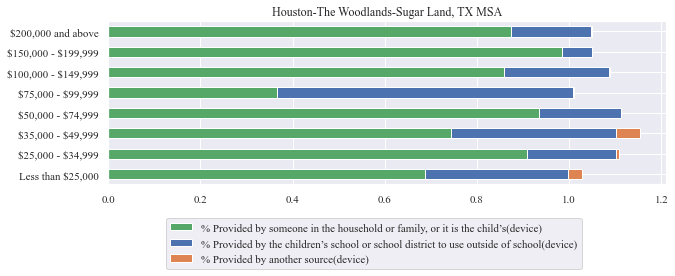

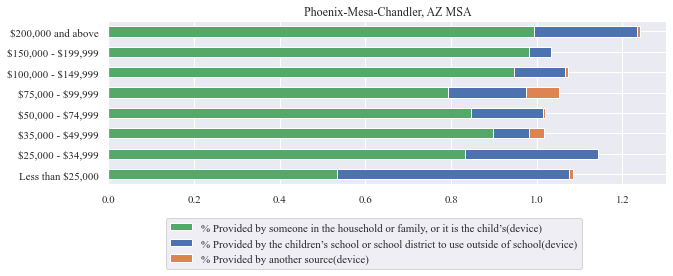

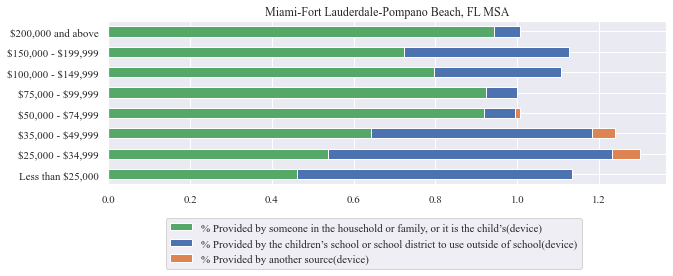

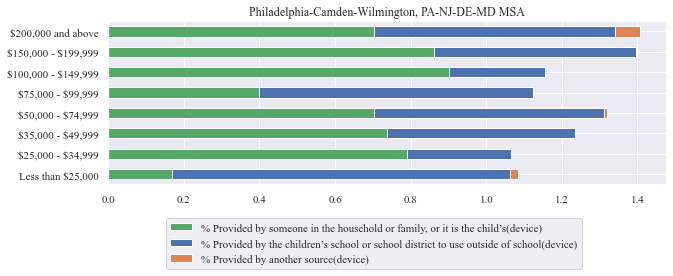

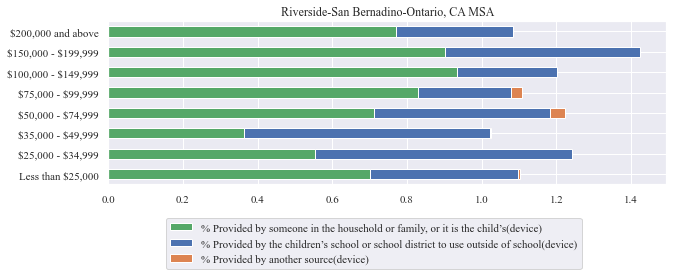

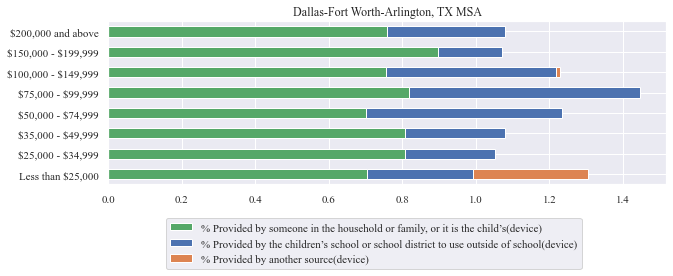

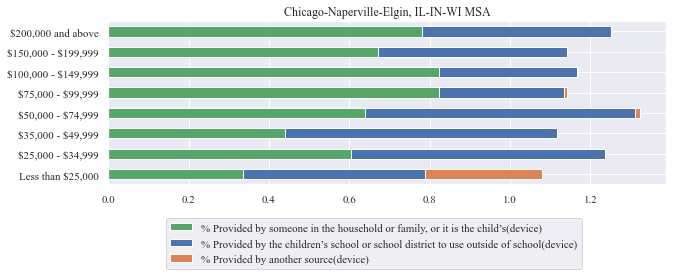

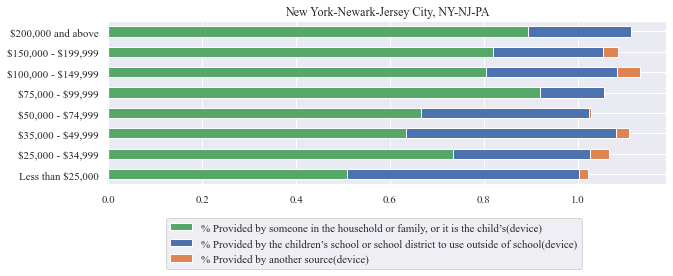

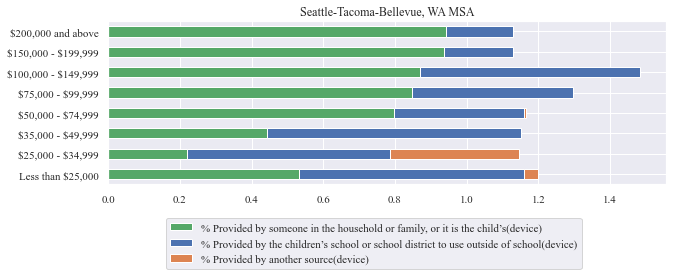

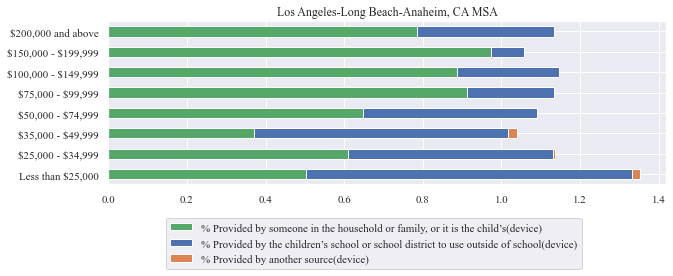

In [44]:
# within the same week, the best way to compare is accross MSAs
for places in income_dict.keys():
    income_dict[places][graph_list[0:3]].plot.barh(
        stacked=True, figsize=(10,3))
    plot.legend(bbox_to_anchor=(.85, -.2), loc='best',
               ncol=1, borderaxespad=0.1)
    plot.title(places)
    plot.savefig(f'../figures/EDU/income/Week11/DevicebyIncome-{places}',bbox_inches='tight',dpi=500)

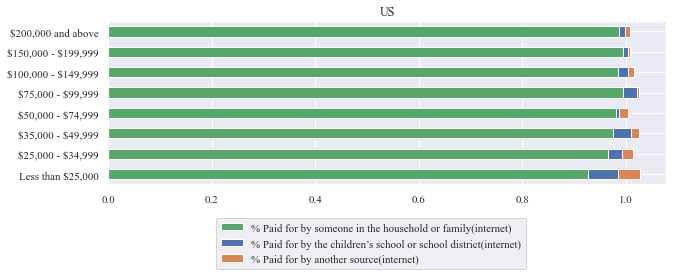

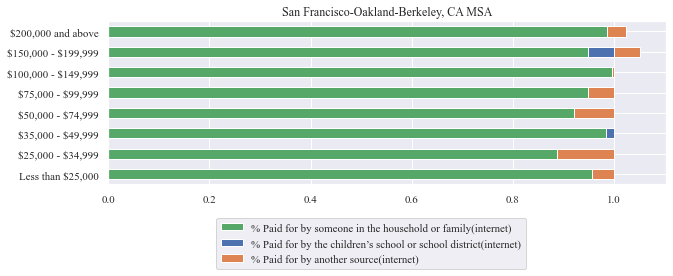

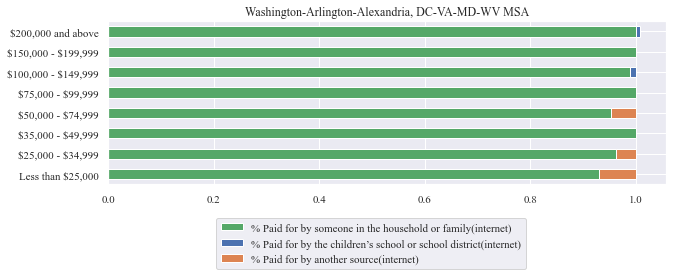

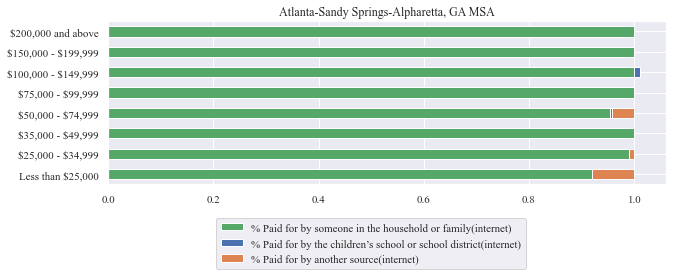

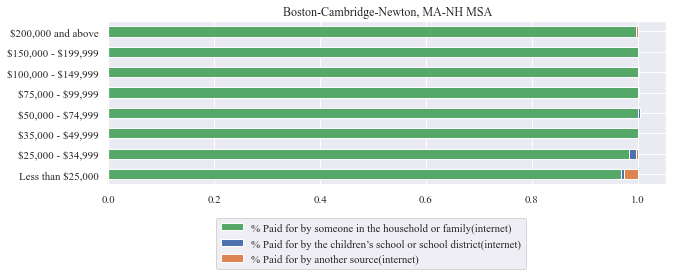

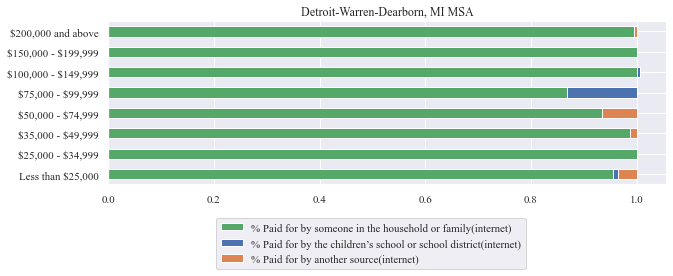

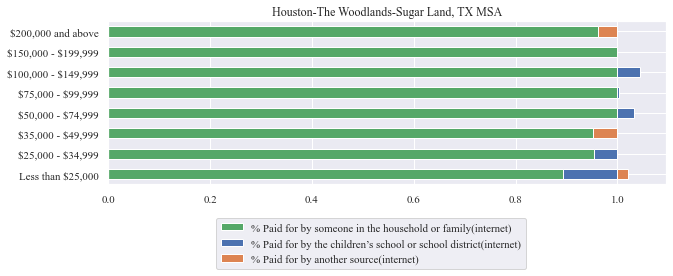

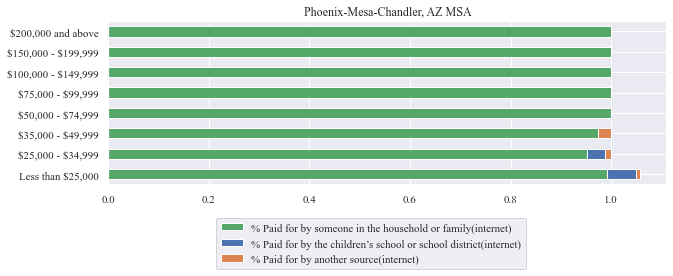

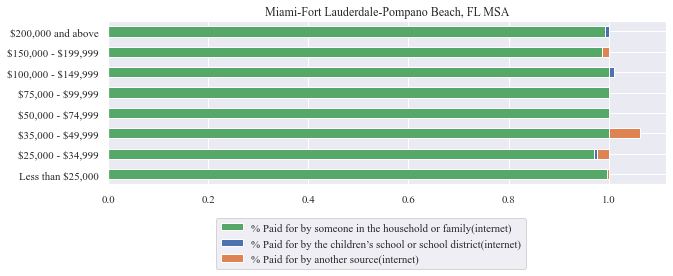

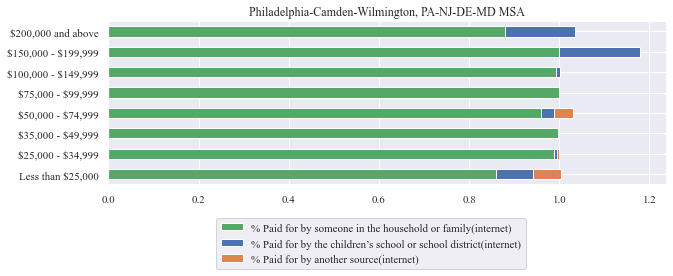

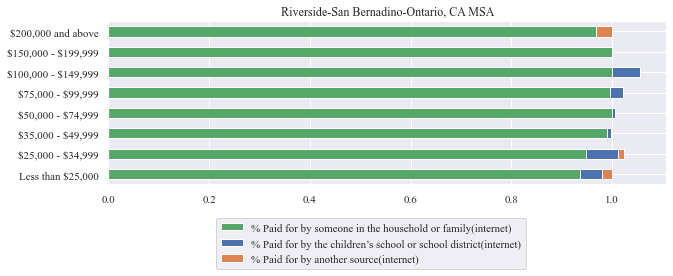

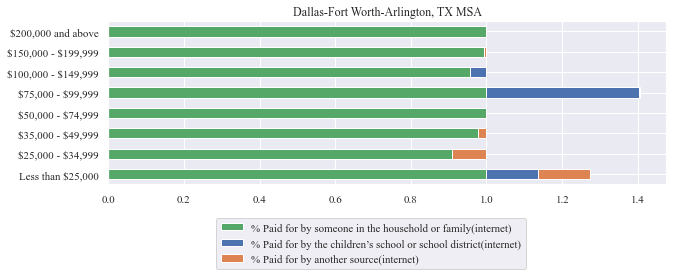

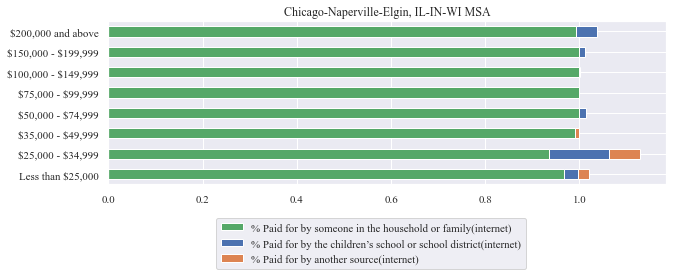

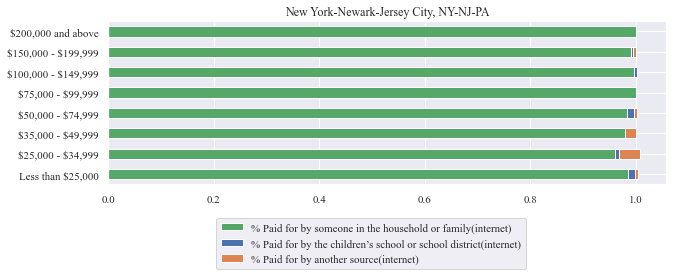

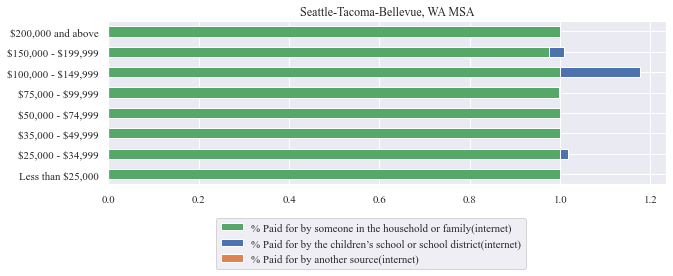

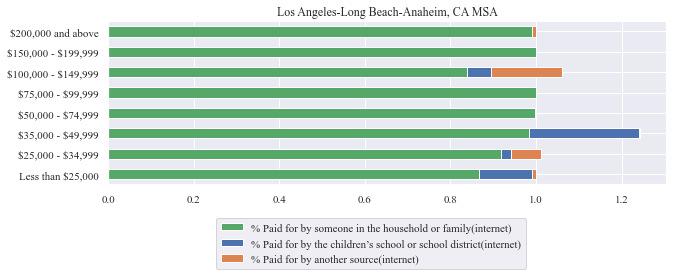

In [45]:
# within the same week, the best way to compare is accross MSAs
for places in income_dict.keys():
    income_dict[places][graph_list[3:]].plot.barh(stacked=True, figsize=(10,3))
    plot.legend(bbox_to_anchor=(0.75, -.2), loc='best',
               ncol=1, borderaxespad=0.1)
    plot.title(places)
    plot.savefig(f'../figures/EDU/income/Week11/InternetbyIncome-{places}',bbox_inches='tight',dpi=500)

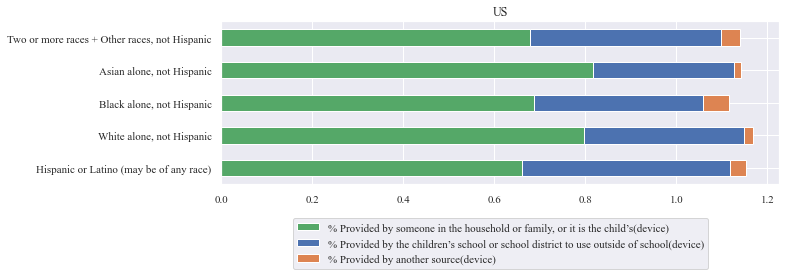

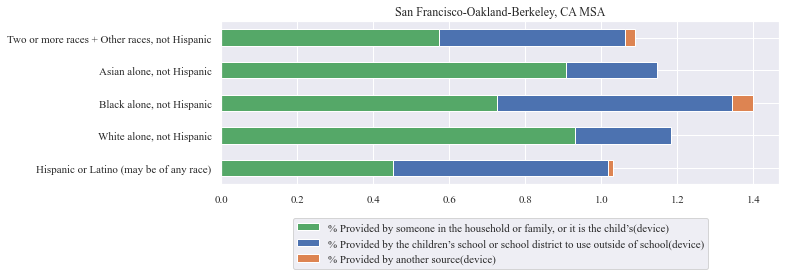

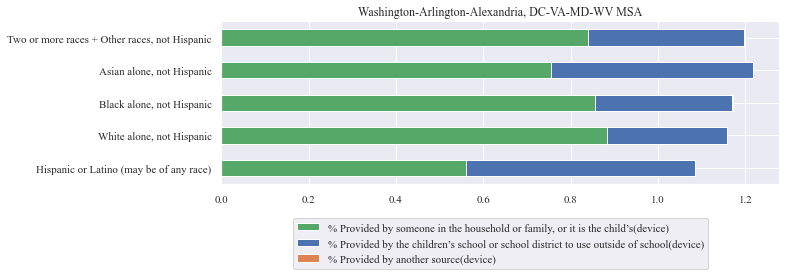

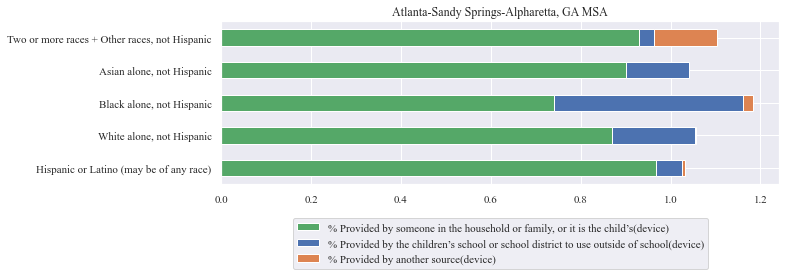

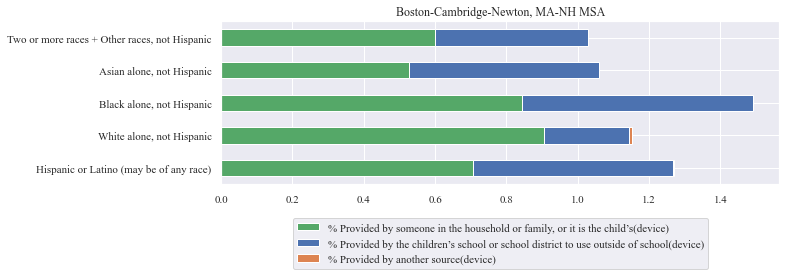

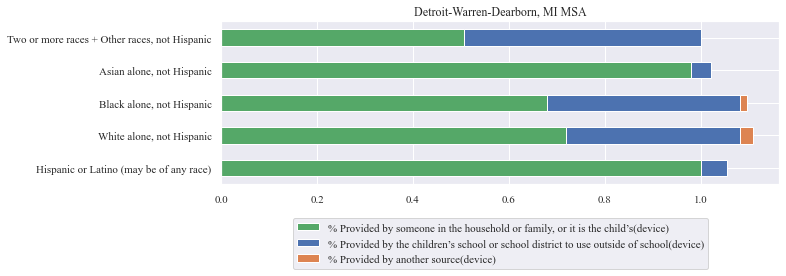

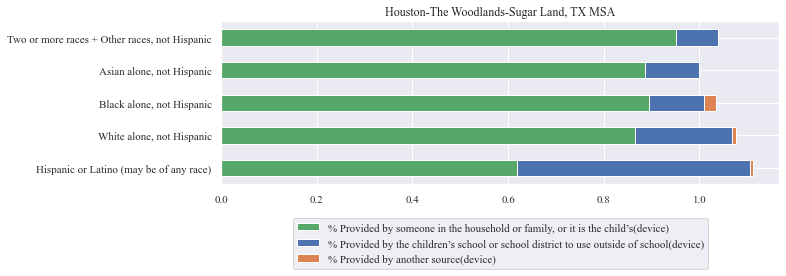

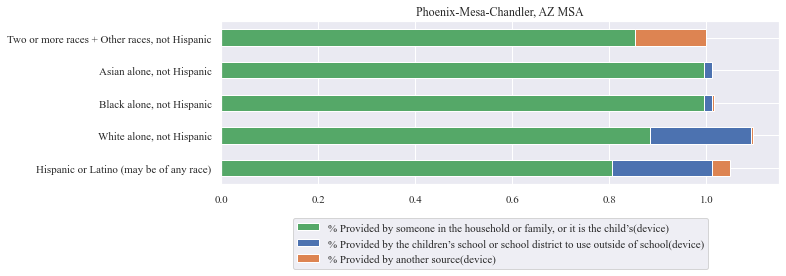

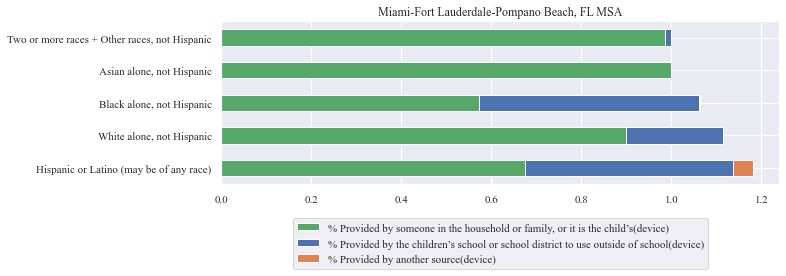

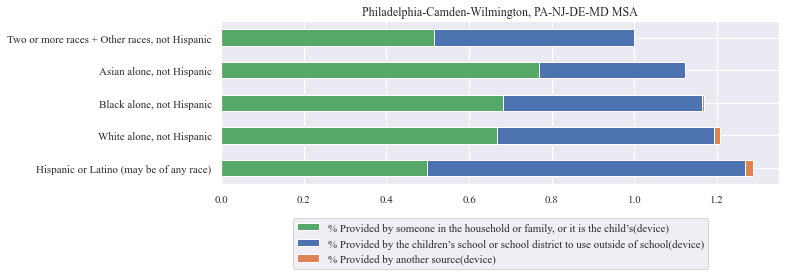

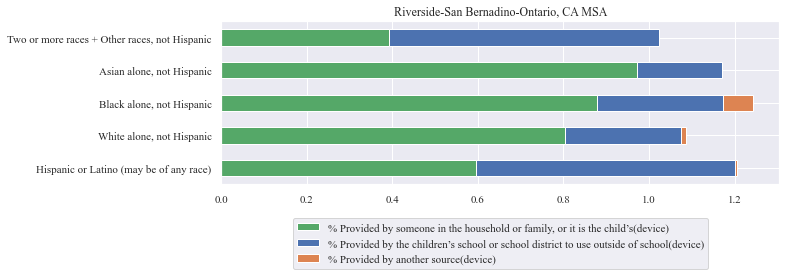

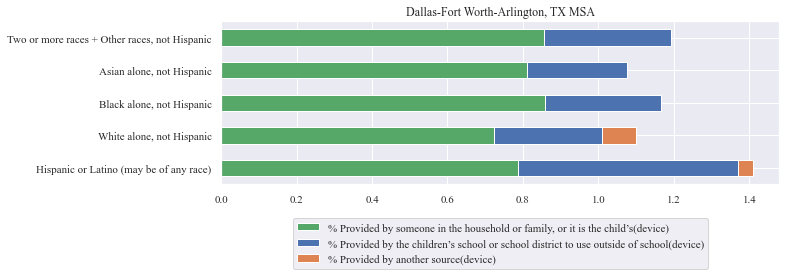

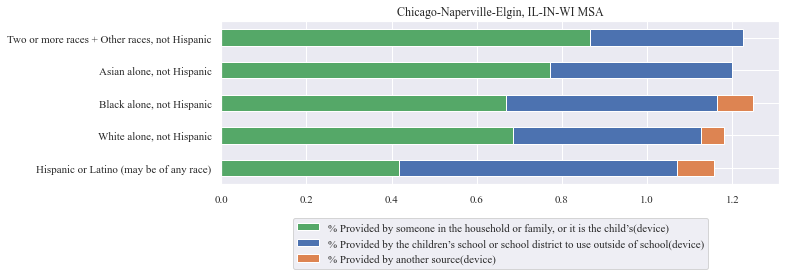

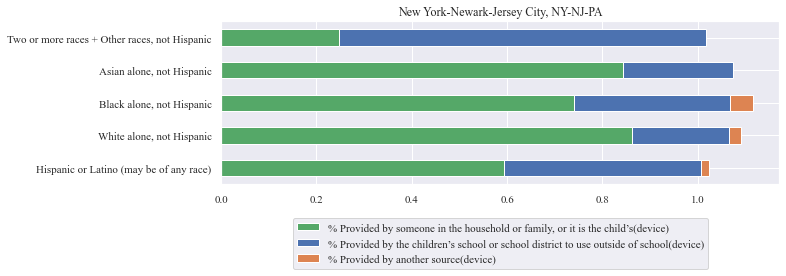

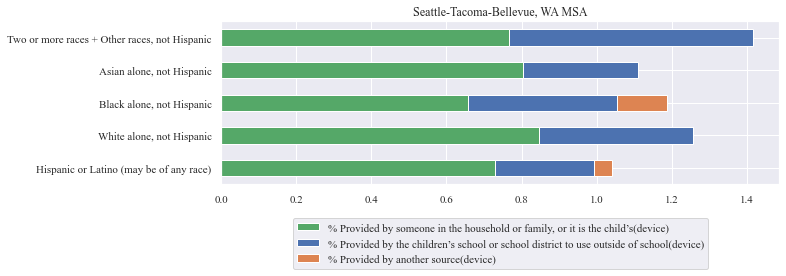

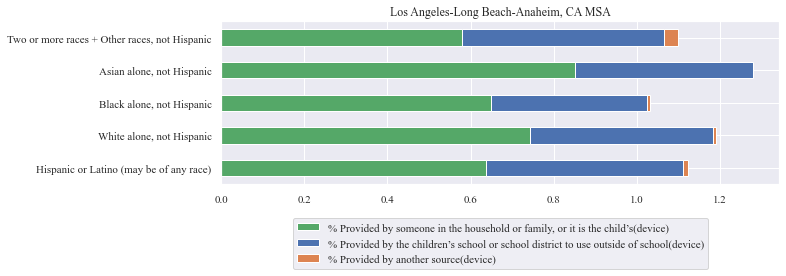

In [51]:
# within the same week, the best way to compare is accross MSAs
for places in race_dict.keys():
    race_dict[places][graph_list[0:3]].plot.barh(stacked=True, figsize=(10,3))
    plot.legend(bbox_to_anchor=(0.875, -.2), loc='best',
               ncol=1, borderaxespad=0.1)
    plot.title(places)
    plot.savefig(f'../figures/EDU/race/Week11/DevicebyRace-{places}',bbox_inches='tight',dpi=500)

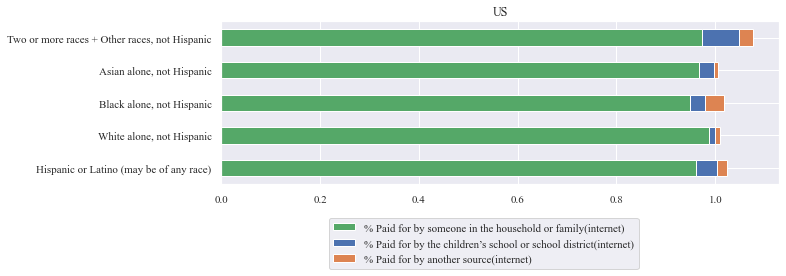

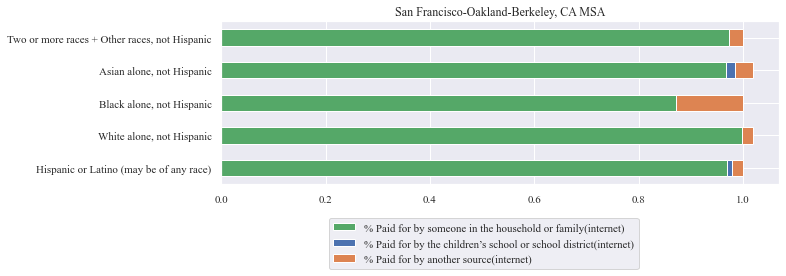

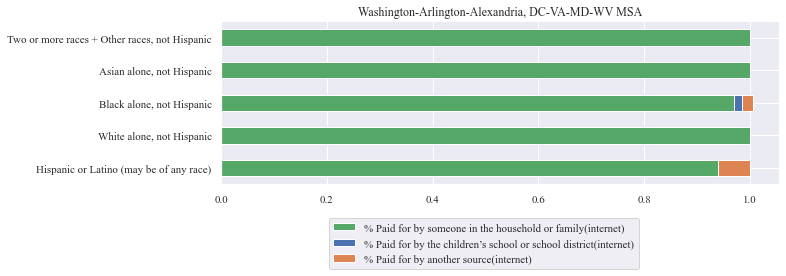

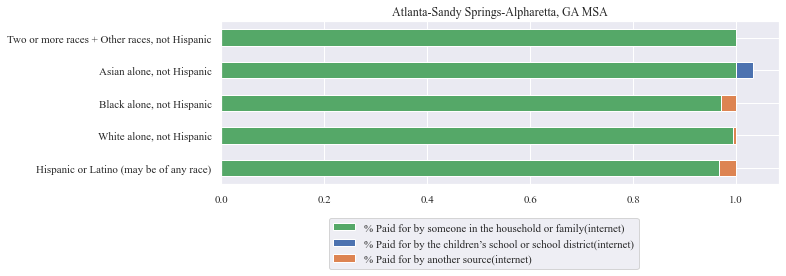

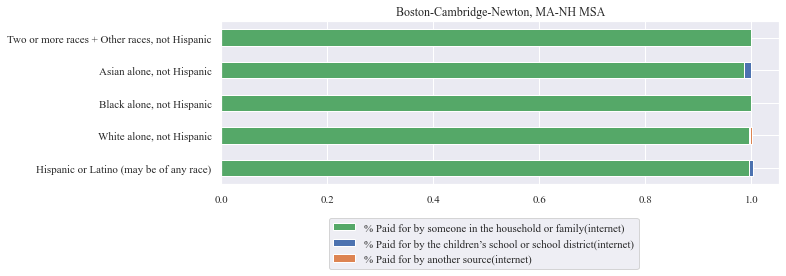

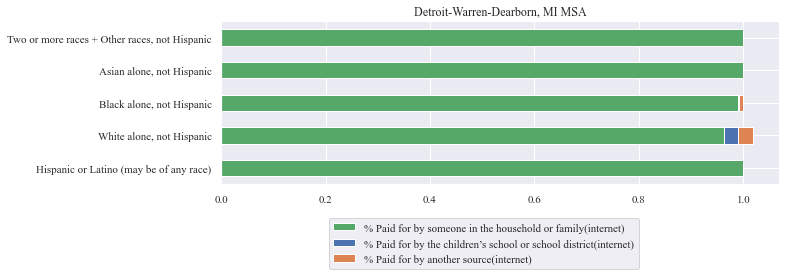

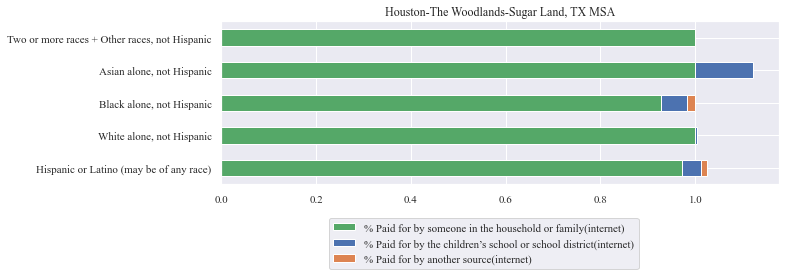

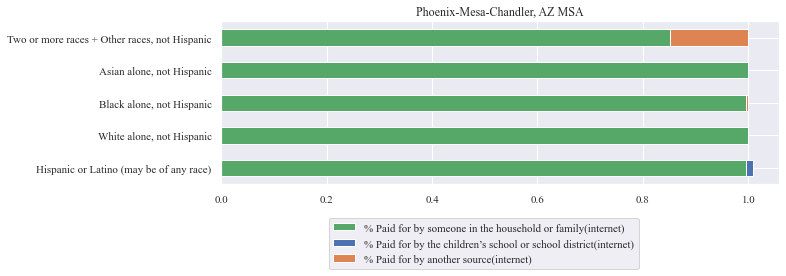

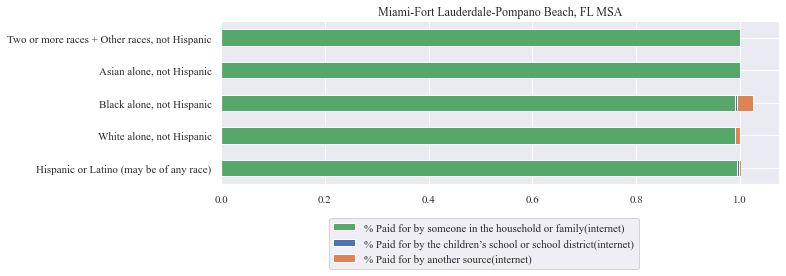

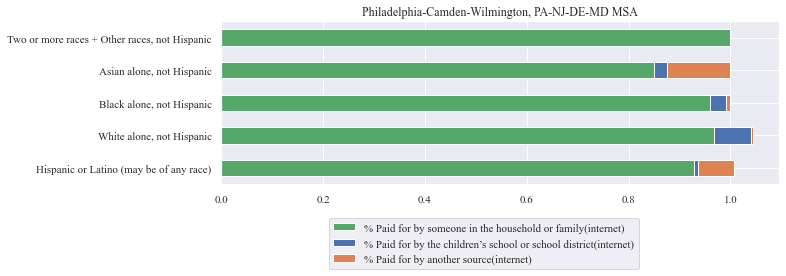

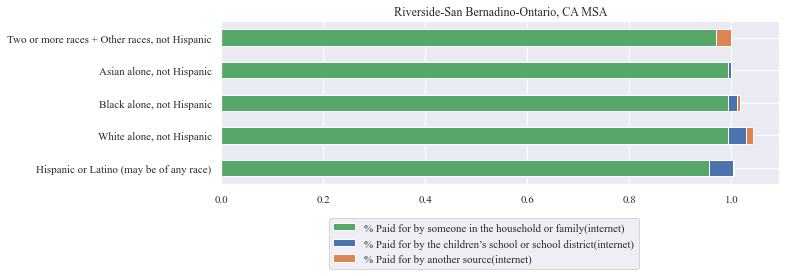

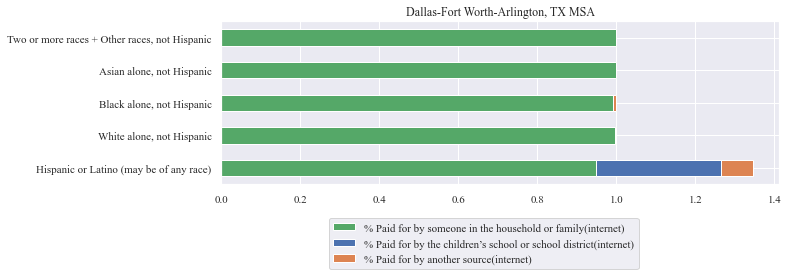

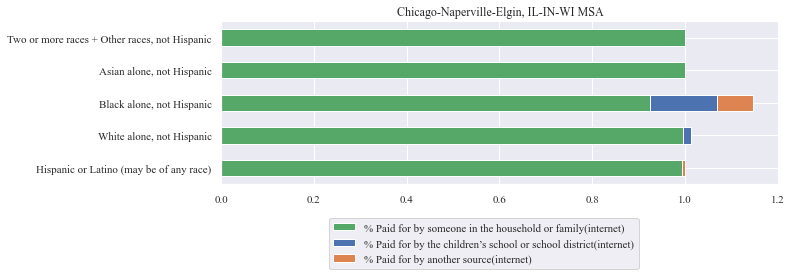

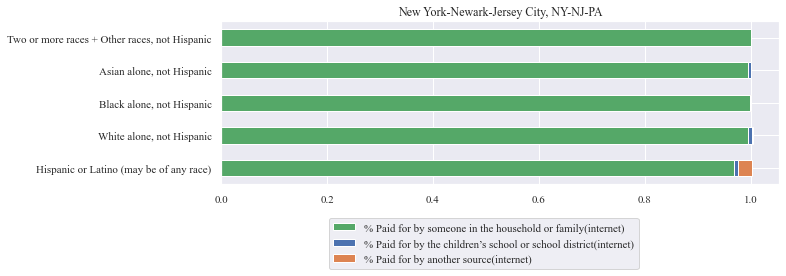

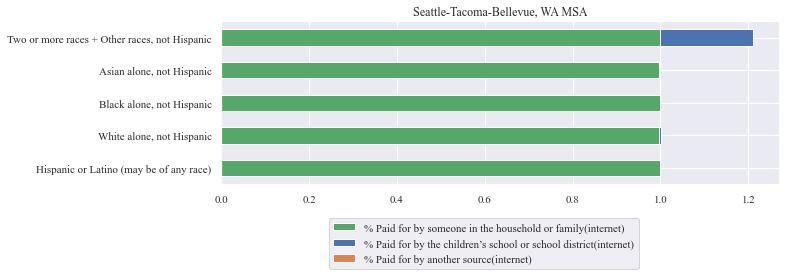

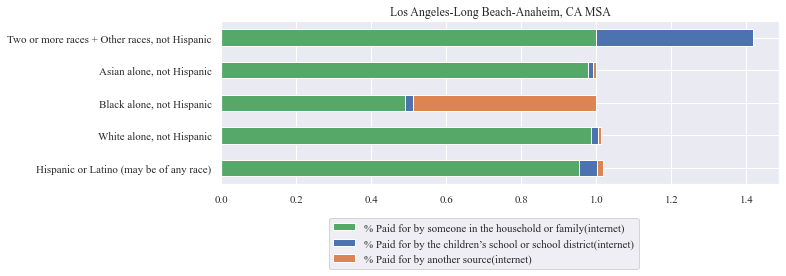

In [52]:
# within the same week, the best way to compare is accross MSAs
for places in race_dict.keys():
    race_dict[places][graph_list[3:]].plot.barh(stacked=True, figsize=(10,3))
    plot.legend(bbox_to_anchor=(0.75, -.2), loc='best',
               ncol=1, borderaxespad=0.1)
    plot.title(places)
    plot.savefig(f'../figures/EDU/race/Week11/InternetbyRace-{places}',bbox_inches='tight',dpi=500)

### Writing the Dataframes out to CSV

Manually wrap text in spreadsheet app for ease of use for next person.

In [17]:
sheets = pd.ExcelWriter('../data/processed_data/EDU_Race_Week11.xlsx')

# Write each dataframe to a different worksheet.
for places in race_dict.keys():
    race_dict[places].to_excel(sheets, sheet_name=places)

# Close the Pandas Excel writer and output the Excel file.
sheets.save()


/home/andrew/anaconda3/envs/icsd-pulse/lib/python3.7/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [18]:
sheets = pd.ExcelWriter('../data/processed_data/EDU_Income_Week11.xlsx')

# Write each dataframe to a different worksheet.
for places in income_dict.keys():
    race_dict[places].to_excel(sheets, sheet_name=places)

# Close the Pandas Excel writer and output the Excel file.
sheets.save()


In [ ]:
msa_dframe.to_csv('../data/processed_data/EMP_MSAs.csv')